In [2]:
# Nguyen Hai Duong
# nhduong_3010@live.com
# Chonnam National University
# 2018.01.21

# Overview
- MNIST dataset
  + Goal: recognizing handwritten digits
  + Input: a 28x28 image
  + Output: class label (0, 1,..., 9)
- Defining an CNN+MLP for MNIST
- Training and evaluating an CNN+MLP

# Import libraries

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import SGD

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import time
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
num_classes = 10   # 10 classes: 0, 1,..., 9

# (1) Data

In [5]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


# (2) Declare model

In [6]:
# 28x28 MNIST image
input_image = Input(shape=(28, 28, 1), name='Input')

# conv, pooling layers + dropout
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', name='conv1')(input_image)
x = MaxPooling2D(pool_size=(2, 2), name='pool1')(x)
x = Dropout(rate=0.2, name='conv_dropout1')(x)

x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', name='conv2')(x)
x = MaxPooling2D(pool_size=(2, 2), name='pool2')(x)
x = Dropout(rate=0.2, name='conv_dropout2')(x)

x = Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu', name='conv3')(x)
x = MaxPooling2D(pool_size=(2, 2), name='pool3')(x)
x = Dropout(rate=0.2, name='conv_dropout3')(x)

# similar to the MLP example!
# matrix ---> vector
x = Flatten(name='flatten')(x)

# FC layers + dropout
x = Dense(units=512, activation='relu', name='fc1')(x)
x = Dropout(rate=0.2, name='fc_dropout1')(x)

x = Dense(units=512, activation='relu', name='fc2')(x)
x = Dropout(rate=0.2, name='fc_dropout2')(x)

output_label = Dense(units=num_classes, activation='softmax', name='fc3_10ways_softmax')(x)

# define model
model = Model(inputs=input_image, outputs=output_label, name='mnist_mlp')

# print model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 28, 28, 64)        640       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv_dropout1 (Dropout)      (None, 14, 14, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 128)       73856     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 7, 7, 128)         0         
_________________________________________________________________
conv_dropout2 (Dropout)      (None, 7, 7, 128)         0         
__________

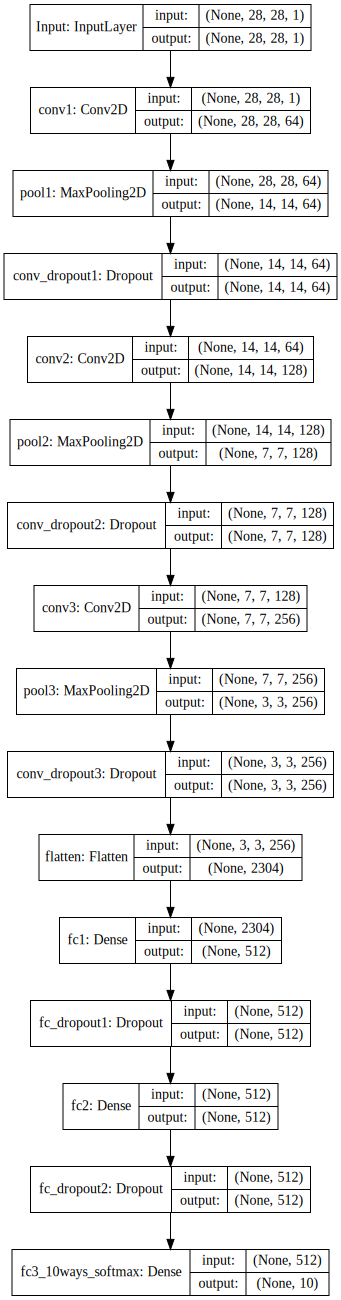

In [7]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# (3) Train defined model
- Note that the training history including loss and accuracy will be save in 'history' variable
- In case your system runs out of memory (OOM), try to decrease batch size

In [18]:
# declare learning rate, loss function, and model metric
loss = 'categorical_crossentropy'
lr = 0.01
model.compile(loss=loss, optimizer=SGD(lr=lr), metrics=['accuracy'])

# train the model
batch_size = 128
epochs = 30

starting_time = time.time()
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batch_size,
                    epochs=epochs)
print('> training time is %.4f minutes' % ((time.time() - starting_time)/60))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 150us/step - loss: 2.1500 - acc: 0.2756 - val_loss: 1.2856 - val_acc: 0.7102
Epoch 2/30
60000/60000 [==============================] - 8s 138us/step - loss: 0.8471 - acc: 0.7161 - val_loss: 0.3259 - val_acc: 0.9061
Epoch 3/30
60000/60000 [==============================] - 8s 138us/step - loss: 0.4268 - acc: 0.8618 - val_loss: 0.1936 - val_acc: 0.9404
Epoch 4/30
60000/60000 [==============================] - 8s 139us/step - loss: 0.2960 - acc: 0.9058 - val_loss: 0.1516 - val_acc: 0.9514
Epoch 5/30
60000/60000 [==============================] - 8s 139us/step - loss: 0.2331 - acc: 0.9252 - val_loss: 0.1169 - val_acc: 0.9625
Epoch 6/30
60000/60000 [==============================] - 8s 138us/step - loss: 0.1959 - acc: 0.9382 - val_loss: 0.1041 - val_acc: 0.9652
Epoch 7/30
60000/60000 [==============================] - 8s 138us/step - loss: 0.1726 - acc: 0.9453 - val_loss: 0.0884 - 

### Training time
- Training time with GTX 1080 is about 4.2231 minutes for 30 epochs
- Training time with Core i7 is around 105.5 minutes for 30 epochs

# (4) Evaluate trained model

In [19]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 119us/step
Test loss: 0.03192299669235945
Test accuracy: 0.9889


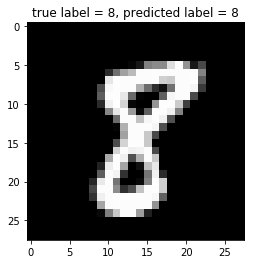

In [29]:
# select a test image randomly
random_test_index = np.random.choice(x_test.shape[0], size=1)[0]
test_img = x_test[random_test_index]
test_label = np.argmax(y_test[random_test_index])

# predict test image with trained model
pred_label = model.predict(np.expand_dims(test_img, axis=0))
pred_label = np.argmax(pred_label)

plt.imshow(test_img[:, :, 0], cmap='gray')
plt.title('true label = %d, predicted label = %d' % (test_label, pred_label))
plt.show()